In [1]:
#Imports

import sys
import matplotlib.pyplot as plt
from libsbml import *
import tellurium as te

/home/joachim/.conda/envs/sysbio/lib/python2.7/site-packages/tellurium/sedml/tesedml.py:103: UserWarning: Dependencies for SEDML code execution not fullfilled.
  warnings.warn("Dependencies for SEDML code execution not fullfilled.")
/home/joachim/.conda/envs/sysbio/lib/python2.7/site-packages/tellurium/notebooks/__init__.py:16: UserWarning: Notebook tools are not imported, due to missing dependencies.
  warnings.warn("Notebook tools are not imported, due to missing dependencies.")


In [2]:
# Path of the SBML-File containing the groups g4, g6, g12 and g14

sbml_path = "all_groups_fluxes_squeezed.xml"

In [3]:
# read in SBML File

reader = SBMLReader()
document = reader.readSBMLFromFile(sbml_path)
model = document.getModel()

In [4]:
# List of metabolites their boundary is set to True

boundary_true = [#Currency Metabolites
                'M_atp_c',
                'M_adp_c',
                'M_amp_c',
                'M_nad_c',
                'M_nadh_c',
                'M_nadp_c',
                'M_nadph_c',
                'M_co2_c',
                'M_h_c',
                'M_coa_c',
                'M_fad_c',
                'M_fadh2_c',
                'M_pi_c',
                'M_ppi_c',
                'M_for_c',
                'M_o2_c',
                'M_lpam_c',
                'M_dhlam_c',
                'M_hco3_c',
                'M_mql8_c',
                'M_mqn8_c',
                'M_3mob_c',
                'M_8aonn_c',
                'M_dann_c',
                'M_met__L_c',
                #Main metabolites
                'M_acser_c',
                'M_acald_c',
                'M_3c3hmp_c',
                'M_malcoa_c',
                'M_lac__D_c',
                'M_pep_c',
                'M_glu__L_c',
                'M_1pyr5c_c',
                'M_gln__L_c',
                'M_chor_c',
                'M_hmbil_c',
                'M_cpppg3_c',
                'M_dscl_c',
                'M_amob_c',
                'M_met__L_c',
                'M_hcys__L_c',
                'M_cys__L_c',
                'M_ahcys_c',
                'M_adcobdam_c',
                'M_adcobhex_c',
                'M_hco3_c',
                'M_2kmb_c']

In [5]:
# Iterate over all metabolites in boundary_true and set the boundary condition to true
for species in boundary_true:
    s = model.getSpecies(species)
    #print(species + " : " + str(s == None))
    s.setBoundaryCondition(True)

In [26]:
# Alter the forward rate of a given reaction to the value kf
# assuming mass action kinetics
def set_kf(reaction, kf):
    kfs = 'kf_'
    kin = reaction.getKineticLaw()
    param = kin.getLocalParameter(kfs + reaction.getId())
    param.setValue(kf)
    
# Alter the reverse rate of a given reaction to the value kr
# assuming mass action kinetics
def set_kr(reaction, kr):
    krs = 'kr_'
    kin = reaction.getKineticLaw()
    param = kin.getLocalParameter(krs + reaction.getId())
    param.setValue(kr)
    
# Alter the forward and reverse rate of a given bidirectional (reversible) reaction to the value k
# assuming mass action kinetics
def set_kbd(reaction, k):
    kfs = 'kf_'
    krs = 'kr_'
    kin = reaction.getKineticLaw()
    param_f = kin.getLocalParameter(kfs + reaction.getId())
    param_f.setValue(k)
    param_r = kin.getLocalParameter(krs + reaction.getId())
    param_r.setValue(k)
    

In [27]:
# Testing of several different reaction rates

#set_kf(model.getReaction('R_ME1'), 1000)   
#set_kf(model.getReaction('R_PC'), 0.001)   
#set_kf(model.getReaction('R_POX2'), 0.001)
#set_kf(model.getReaction('R_MDH3'), 0.001) 
#set_kf(model.getReaction('R_ACS'), 0.001) 
#set_kf(model.getReaction('R_AKGDb'), 1) 


#set_kf(model.getReaction('R_MDH3'), 0)
#set_kbd(model.getReaction('R_MDH'), 0)
set_kbd(model.getReaction('R_FUM'), 0)
#set_kf(model.getReaction('R_PPCK'), 0)
#set_kf(model.getReaction('R_PC'), 0)
#set_kr(model.getReaction('R_ICDHyr'), 0)
#set_kf(model.getReaction('R_PPCK'), 0)


In [28]:
# write the file to a new SBML-File

outfile = 'all_groups_with_fluxes_and_boundaries.xml'
writer = SBMLWriter()
writer.writeSBMLToFile(model.getSBMLDocument(), outfile)

True

In [29]:
# Load the SBML Model from the just created file
sbml_model = te.loadSBMLModel(outfile)

In [30]:
# Plot function that was part of an assignment sheet

def plot(simulation, xrange=None, yrange=None, columns=None, species_labels=None, xscale='linear', yscale='linear', autolegend=True, legend=True, linewidth=2.0):
    plt.xscale(xscale)
    plt.yscale(yscale)
    
    if columns is None:
        columns = simulation.colnames[1:]
    
    if species_labels != None and len(columns)!=len(species_labels):
        return
    
    label_index = 0
    
    for species in columns:
        
        if xrange is not None:
            plt.xlim(xrange[0], xrange[1])
        if yrange is not None:
            plt.ylim(yrange[0], yrange[1])
        plt.plot(simulation['time'], simulation['['+species+']'], label=species_labels[label_index], linewidth=linewidth)
        label_index += 1
        
    if legend:
        plt.legend()
    if autolegend:
        plt.legend(loc='best')

In [31]:
# List of all species relevant for the reactions in focus
# Mainly the pyruvate metabolism and the citric acid cycle

species_list = ['M_h2o_c',
            'M_oaa_c',
            'M_cit_c',
            'M_coa_c',
            'M_h_c',
            'M_accoa_c',
            'M_icit_c',
            'M_akg_c',
            'M_co2_c',
            'M_nadp_c',
            'M_nadph_c',
            'M_sdhlam_c',
            'M_lpam_c',
            'M_succoa_c',
            'M_dhlam_c',
            'M_atp_c',
            'M_succ_c',
            'M_adp_c',
            'M_pi_c',
            'M_fadh2_c',
            'M_fum_c',
            'M_fad_c',
            'M_mal__L_c',
            'M_nadh_c',
            'M_nad_c',
            'M_mqn8_c',
            'M_mql8_c',
            'M_pep_c',
            'M_hco3_c',
            'M_pyr_c',
            'M_o2_c',
            'M_h2o2_c',
            'M_actp_c',
            'M_ac_c',
            'M_ppi_c',
            'M_amp_c',
            'M_for_c',
            'M_acald_c',
            'M_lac__D_c',
            'M_glu__L_c',
            'M_2kmb_c',
            'M_met__L_c',
            'M_acorn_c',
            'M_acg5sa_c',
            'M_hcys__L_c',
            'M_amet_c',
            'M_ahcys_c',
            'M_8aonn_c',
            'M_amob_c',
            'M_dann_c',
            'M_dscl_c',
            'M_uppg3_c',
            'M_asp__L_c',
            'M_asn__L_c',
            'M_gln__L_c',
            'M_chor_c',
            'M_4adcho_c',
            'M_adcobdam_c',
            'M_adcobhex_c',
            'M_1pyr5c_c',
            'M_cys__L_c',
            'M_acser_c',
            'M_h2s_c',
            'M_cpppg3_c',
            'M_hmbil_c',
            'M_pro__L_c',
            'M_1pyr5c_c',
            #'M_pro__L_c',
            'M_3mob_c',
            'M_3c3hmp_c',
            'M_malcoa_c']

# iterate over all species and set their initial concentration to 10.0
for species in species_list:
    #print sbml_model[species]
    sbml_model[species] = 10.0

In [32]:
# Simulate the model from step 0 to step 100
# step size is 100000
sim = sbml_model.simulate(0, 100, 100000)

In [33]:
#print(sim)
%matplotlib inline

In [34]:
# Labels of the citric acid cycle their concentrations should be plotted
citrate_labels = ['L-Malate',
                 'Oxalacetate',
                 'Citrate',
                 'Isocitrate',
                 '2-Oxoglutarate',
                 'S Succinyldihydrolipoamide',
                 'Succinyl-CoA',
                 'Succinyl',
                 'Fumarase']


# Labels of the pyruvate metabolism their concentrations should be plotted
pyruvate_labels = ['Pyruvate',
                  'Acetyl-CoA',
                  'Acetate',
                  'Acetyl phosphate']

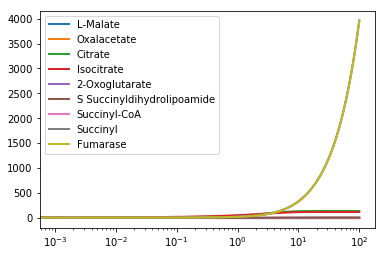

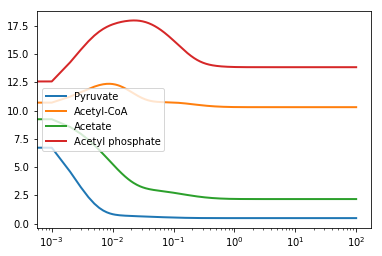

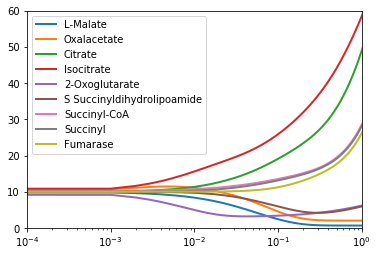

In [35]:
# the name extension for the saved png-plots

name_ext = '_blockfum.png'


# Metabolite names of the citric acid cycle their concentrations should be plotted
columns_citrate = ['M_mal__L_c', 'M_oaa_c', 'M_cit_c', 'M_icit_c', 'M_akg_c', 'M_sdhlam_c', 'M_succoa_c', 'M_succ_c', 'M_fum_c']

# Metabolite names of the pyruvate metabolism their concentrations should be plotted
columns_pyruvat = ['M_pyr_c', 'M_accoa_c', 'M_ac_c', 'M_actp_c']


# Plot simulation of the citric acid metabolites
plot(sim, columns=columns_citrate, species_labels=citrate_labels, xscale='log')
plt.savefig("citrate_plot_1" + name_ext)
plt.show()

# Plot simulation of the pyruvate metabolism metabolites
plot(sim, columns=columns_pyruvat, species_labels=pyruvate_labels, xscale='log')
plt.savefig("pyruvate_plot_1" + name_ext)
plt.show()

# Labels of the citric acid cycle their concentrations are plotted in the
# limited range from 0.0001 to 1
plot(sim, xrange=[0.0001, 1], yrange=[0,60], species_labels=citrate_labels, columns=columns_citrate, xscale='log')
plt.savefig("citrate_plot_100" + name_ext)
plt.show()


